# Dataset
https://www.kaggle.com/datasets/hassan06/nslkdd/data

## Intrusion Detection System References:
- https://www.kaggle.com/code/sanjay7013/intrusion-detection-system
- https://www.kaggle.com/code/rafik1992/intrusion-detection-system-with-ml-dl-c3e831
- https://www.kaggle.com/code/nadagamal3/intrusion-detection-system-with-ml-dl
- https://www.kaggle.com/code/devikajaiswal/intrusion-detection
- https://www.kaggle.com/code/sharathshebbar/intrusion-detection

## Other references (optional)
- Feature Selection:
https://www.kaggle.com/code/shuaibjawed/notebook4a9b45c19e/notebook

# Libraries / packages

In [4]:
import numpy as np
import pandas as pd

import warnings
import pickle

import matplotlib.pyplot as plt
import seaborn as sns


import xgboost as xgb

from joblib import dump, load

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns',None)
%matplotlib inline

In [5]:
!pip install keras

In [6]:
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.utils import plot_model

# Dataset

In [8]:
# https://www.kaggle.com/datasets/hassan06/nslkdd?resource=download
df = pd.read_csv("KDDTest-21.txt")
df.head()

,13,tcp,telnet,SF,118,2425,0,0.1,0.2,0.3,0.4,1,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.13,0.14,0.15,1.1,1.2,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,26,10,0.38,0.12,0.04,0.00.6,0.00.7,0.00.8,0.12.1,0.30,guess_passwd,2
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [9]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
1,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
2,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
3,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17
4,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,back,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11849 non-null  int64  
 1   protocol_type                11849 non-null  object 
 2   service                      11849 non-null  object 
 3   flag                         11849 non-null  object 
 4   src_bytes                    11849 non-null  int64  
 5   dst_bytes                    11849 non-null  int64  
 6   land                         11849 non-null  int64  
 7   wrong_fragment               11849 non-null  int64  
 8   urgent                       11849 non-null  int64  
 9   hot                          11849 non-null  int64  
 10  num_failed_logins            11849 non-null  int64  
 11  logged_in                    11849 non-null  int64  
 12  num_compromised              11849 non-null  int64  
 13  root_shell      

In [11]:
# df.describe()

df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000,11849.000000
mean,415.473795,19458.073340,1228.004220,0.000591,0.016035,0.001350,0.190227,0.041185,0.253017,0.227699,0.004304,0.000506,0.218077,0.016204,0.002194,0.003882,0.000000,0.000928,0.052916,94.123977,48.273441,0.113851,0.114600,0.274336,0.268378,0.752987,0.157162,0.096770,213.961263,117.550679,0.539610,0.148989,0.206507,0.024467,0.104190,0.106706,0.263964,0.252205,15.327960
std,1919.519063,652014.008521,23897.037775,0.024300,0.196387,0.050302,1.222442,0.205409,0.434759,10.026197,0.065468,0.029048,11.091406,0.933241,0.066213,0.076767,0.000000,0.030456,0.223875,153.423049,119.218148,0.305956,0.309228,0.430364,0.430260,0.399054,0.338772,0.278675,82.189060,106.563355,0.423385,0.288770,0.379206,0.114238,0.265095,0.278559,0.377350,0.403056,4.405964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,255.000000,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,17.000000
75%,1.000000,160.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,132.000000,16.000000,0.000000,0.000000,0.840000,0.800000,1.000000,0.060000,0.000000,255.000000,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,18.000000
max,57715.000000,62825648.000000,1288652.000000,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [12]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

# Data Preprocessing

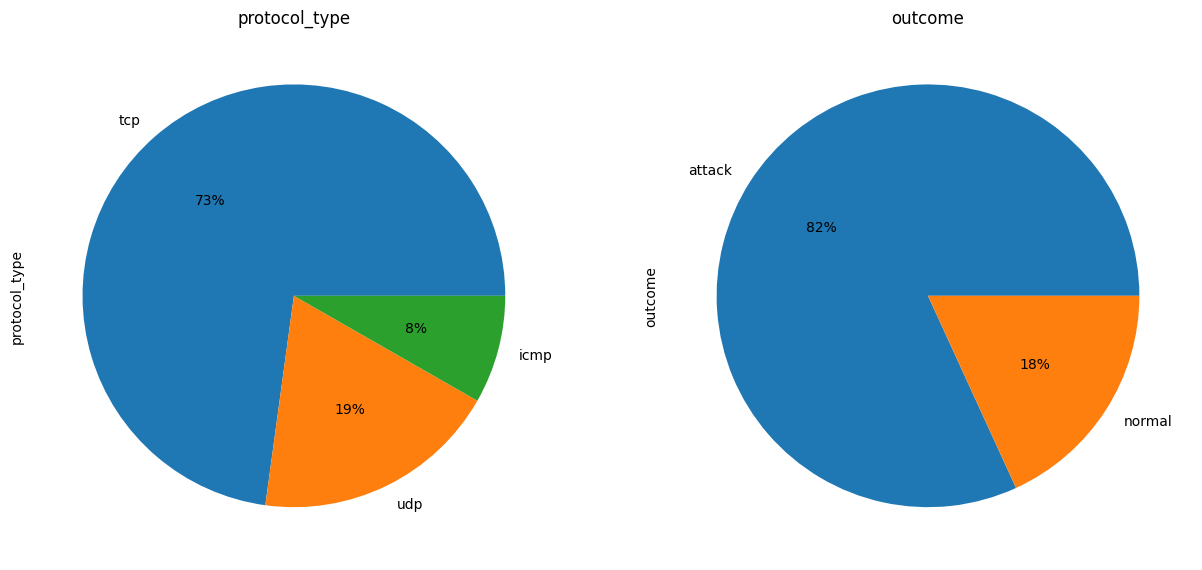

In [13]:
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'

pie_plot(df, ['protocol_type', 'outcome'], 1, 2)

In [14]:
# df.loc[df['outcome'] == "normal", "outcome"] = 0
# df.loc[df['outcome'] != 0, "outcome"] = 1

# df.head()

In [15]:
# cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
# try:
#     df.drop(cat_cols, axis=1, inplace=True)
#     print(f"Dropped columns: {cat_cols}")
# except KeyError as e:
#     # print(f"Columns has been deleted before: {e}")
#     pass

# df.head()

In [16]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [17]:
scaled_train = preprocess(df)
# print(scaled_train.head())

In [18]:
# X = df.drop(['outcome'], axis=1)
# # print(X.head())

# y = df['outcome']
# y=y.astype('int')
# # print(y.dtype)
# # print(y)

In [19]:
# std_scaler = StandardScaler()
# x = std_scaler.fit_transform(X)
# # type(x) # numpy.ndarray

# x
# # dump(std_scaler, 'std_scaler.bin', compress=True)

In [20]:
x = scaled_train.drop(['outcome', 'level'], axis=1).values
y = df['outcome'].values
y_reg = df['level'].values
# print(x)
# print(y)
# print(y_reg)

# Feature Selection (PCA)

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

In [21]:
# pca = PCA(n_components=10)
# x = pca.fit_transform(x)
# # type(x) # numpy.ndarray
# x

# scaler_filename = 'scaled-input.npy'
# np.save(scaler_filename, x)

In [22]:
# n_components = 10

# # Get indices of original features with the highest loadings in the first 10 principal components
# sorted_abs_loadings = np.argsort(np.abs(pca.components_[:n_components]), axis=1)
# top_feature_indices_unflattened = sorted_abs_loadings[:, ::-1]

# # Map indices to original feature names
# selected_feature_names = X.columns[top_feature_indices_unflattened.flatten()]

# print("Top 10 selected feature names:")
# for feature_name in selected_feature_names[:n_components]:
#     print(feature_name)


In [23]:
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print(x_reduced)
print(f"Number of original features is {x.shape[1]} and of reduced features is {x_reduced.shape[1]}")

y=y.astype('int')
# print(y)

[[-1.21342089e+02 -4.15572643e+02 -7.15186688e+00 ...  1.60668884e-01
   1.11354530e-01  9.04634206e-02]
 [-1.21616609e+02 -4.15526670e+02 -6.73555466e+00 ...  5.10059098e-01
   1.11378593e+00 -3.78610606e-01]
 [-1.21283848e+02 -4.15575421e+02 -6.57094192e+00 ... -3.40168900e-01
  -3.27315714e-02 -5.53621467e-01]
 ...
 [-1.21582498e+02 -4.14706504e+02 -6.18603577e+00 ...  4.48514692e-01
   3.80380121e-01  1.94036090e-02]
 [-1.21580258e+02 -4.15732779e+02 -6.25824017e+00 ...  4.86173312e-02
   1.04240030e-01  3.12542301e-01]
 [-1.21360681e+02 -4.15570309e+02 -7.15010667e+00 ...  1.76163724e-01
  -4.35907593e-02  1.51770971e-01]]
Number of original features is 114 and of reduced features is 20


# Train test split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_test.shape)

x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
print(x_test_reduced.shape)

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)
print(x_test_reg.shape)

(2370, 114)
(2370, 20)
(2370, 114)


# _Classifier evaluator method

In [25]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]
    print(f"Training Accuracy {name} {train_accuracy*100:.2f}  Test Accuracy {name} {test_accuracy*100:.2f}")
    print(f"Training Precision {name} {train_precision*100:.2f}  Test Precision {name} {test_precision*100:.2f}")
    print(f"Training Recall {name} {train_recall*100:.2f}  Test Recall {name} {test_recall*100:.2f}")
    print(f"Training F1 Score {name} {train_f1*100:.2f}  Test F1 Score {name} {test_f1*100:.2f}")


    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

# Modeling

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

In [26]:
# model = DecisionTreeClassifier()
# model.fit(x_train, y_train)
# evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

In [27]:
# model_filename = 'model.dt.sav'
# pickle.dump(model, open(model_filename, 'wb'))

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 86.26  Test Accuracy Logistic Regression 86.46
Training Precision Logistic Regression 88.21  Test Precision Logistic Regression 88.19
Training Recall Logistic Regression 96.07  Test Recall Logistic Regression 96.27
Training F1 Score Logistic Regression 91.97  Test F1 Score Logistic Regression 92.05


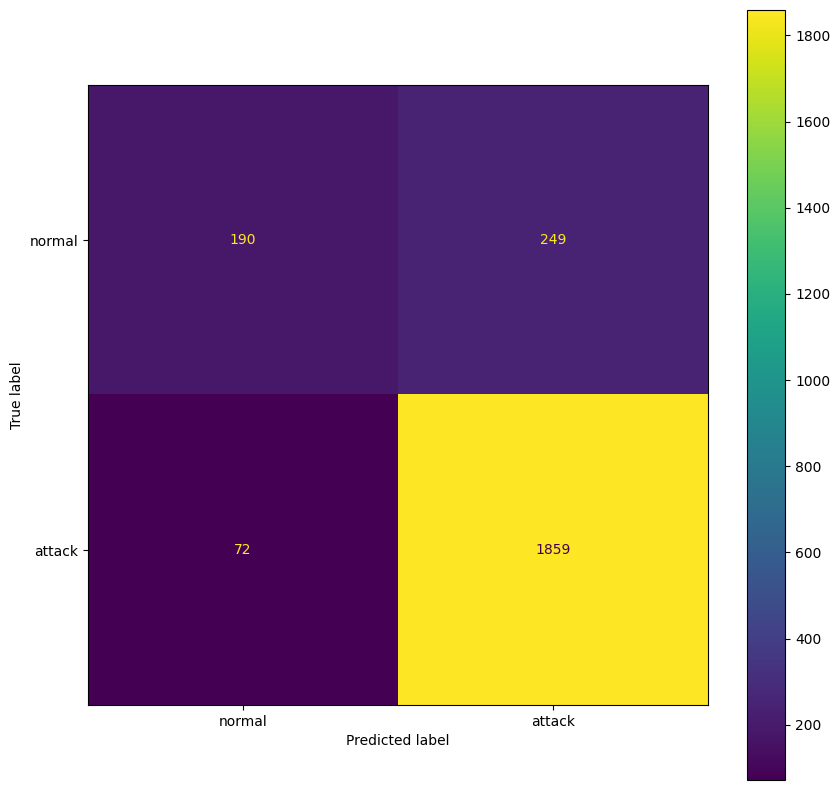

In [28]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

## KNN

Training Accuracy KNeighborsClassifier 93.99  Test Accuracy KNeighborsClassifier 93.00
Training Precision KNeighborsClassifier 94.50  Test Precision KNeighborsClassifier 93.41
Training Recall KNeighborsClassifier 98.39  Test Recall KNeighborsClassifier 98.34
Training F1 Score KNeighborsClassifier 96.40  Test F1 Score KNeighborsClassifier 95.81


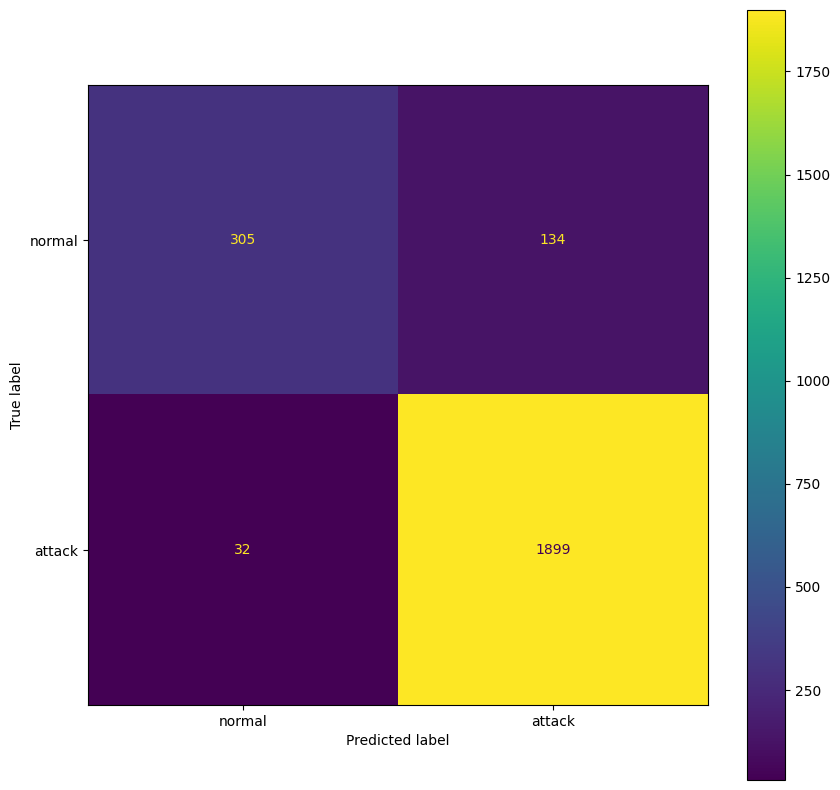

In [29]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## Naive Bayes

Training Accuracy GaussianNB 79.71  Test Accuracy GaussianNB 79.70
Training Precision GaussianNB 95.83  Test Precision GaussianNB 95.20
Training Recall GaussianNB 78.66  Test Recall GaussianNB 79.08
Training F1 Score GaussianNB 86.40  Test F1 Score GaussianNB 86.39


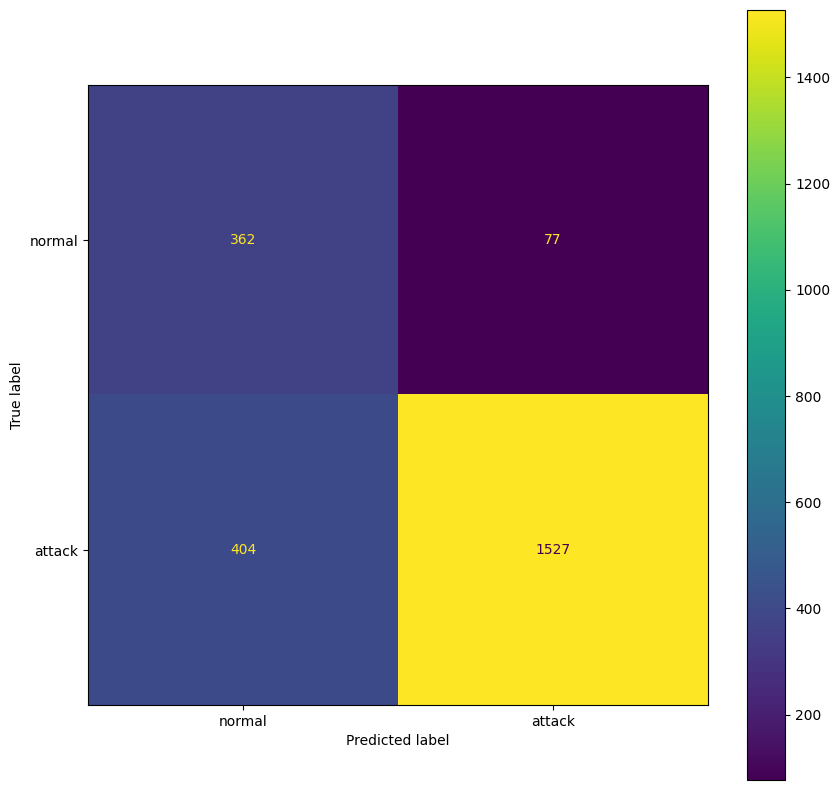

In [30]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## SVM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) 92.43  Test Accuracy Linear SVC(LBasedImpl) 91.90
Training Precision Linear SVC(LBasedImpl) 93.53  Test Precision Linear SVC(LBasedImpl) 93.72
Training Recall Linear SVC(LBasedImpl) 97.50  Test Recall Linear SVC(LBasedImpl) 96.53
Training F1 Score Linear SVC(LBasedImpl) 95.47  Test F1 Score Linear SVC(LBasedImpl) 95.10


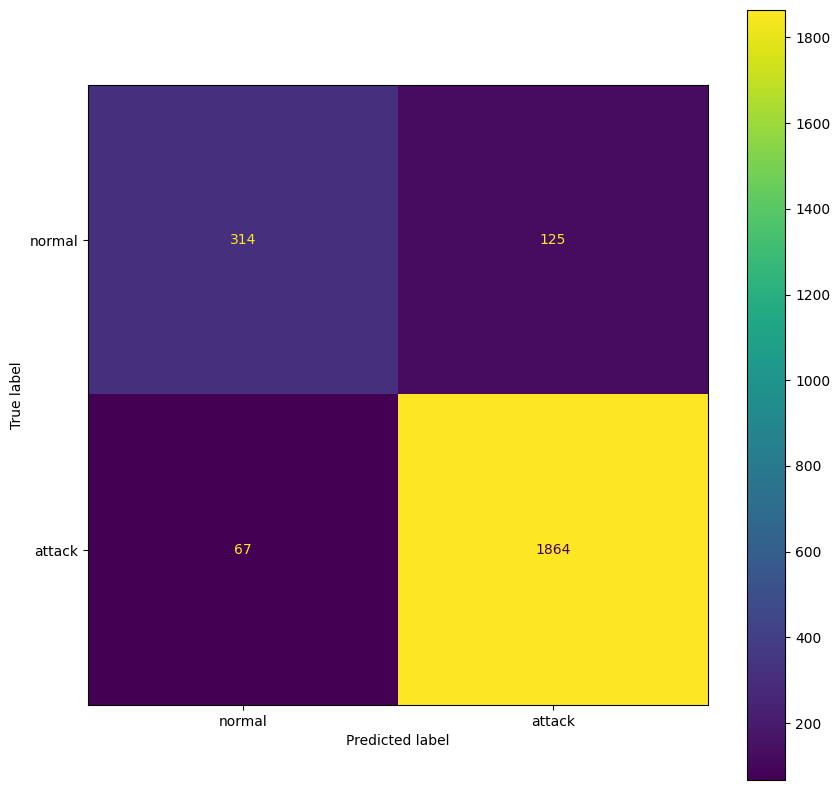

In [31]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## _ f importances method

In [32]:
def f_importances(model, coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title(f'feature importances for {model}')
    plt.show()

## Decision Tree

Training Accuracy DecisionTreeClassifier 99.60  Test Accuracy DecisionTreeClassifier 97.09
Training Precision DecisionTreeClassifier 100.00  Test Precision DecisionTreeClassifier 98.24
Training Recall DecisionTreeClassifier 99.51  Test Recall DecisionTreeClassifier 98.19
Training F1 Score DecisionTreeClassifier 99.75  Test F1 Score DecisionTreeClassifier 98.21


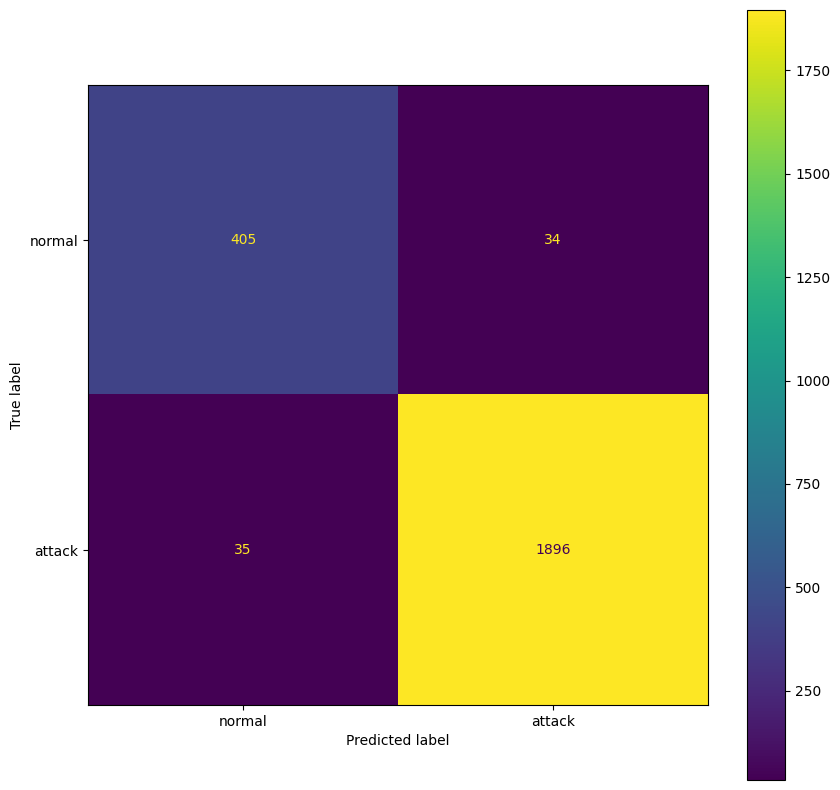

In [33]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

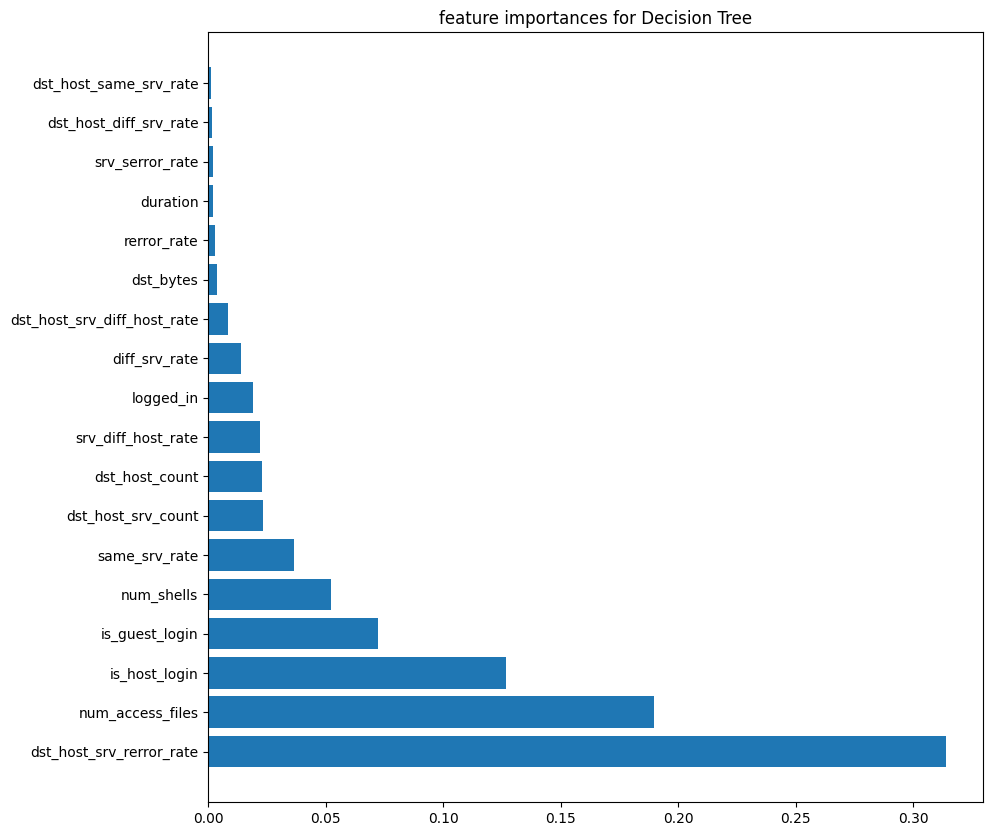

In [34]:
features_names = df.drop(['outcome', 'level'] , axis = 1)
f_importances("Decision Tree", abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5, 0.875, 'x[40] <= 0.5\ngini = 0.296\nsamples = 9479\nvalue = [1713, 7766]'),
 Text(0.25, 0.625, 'x[6] <= 7.882\ngini = 0.142\nsamples = 7681\nvalue = [592, 7089]'),
 Text(0.125, 0.375, 'x[60] <= 0.5\ngini = 0.105\nsamples = 7120\nvalue = [397, 6723]'),
 Text(0.0625, 0.125, 'gini = 0.074\nsamples = 6564\nvalue = [253, 6311]'),
 Text(0.1875, 0.125, 'gini = 0.384\nsamples = 556\nvalue = [144, 412]'),
 Text(0.375, 0.375, 'x[5] <= 9.025\ngini = 0.454\nsamples = 561\nvalue = [195, 366]'),
 Text(0.3125, 0.125, 'gini = 0.308\nsamples = 226\nvalue = [183, 43]'),
 Text(0.4375, 0.125, 'gini = 0.069\nsamples = 335\nvalue = [12, 323]'),
 Text(0.75, 0.625, 'x[20] <= 0.233\ngini = 0.47\nsamples = 1798\nvalue = [1121, 677]'),
 Text(0.625, 0.375, 'x[5] <= 0.303\ngini = 0.395\nsamples = 901\nvalue = [244, 657]'),
 Text(0.5625, 0.125, 'gini = 0.256\nsamples = 596\nvalue = [90, 506]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 305\nvalue = [154, 151]'),
 Text(0.875, 0.375, 'x[6] <= 0.027\ngini

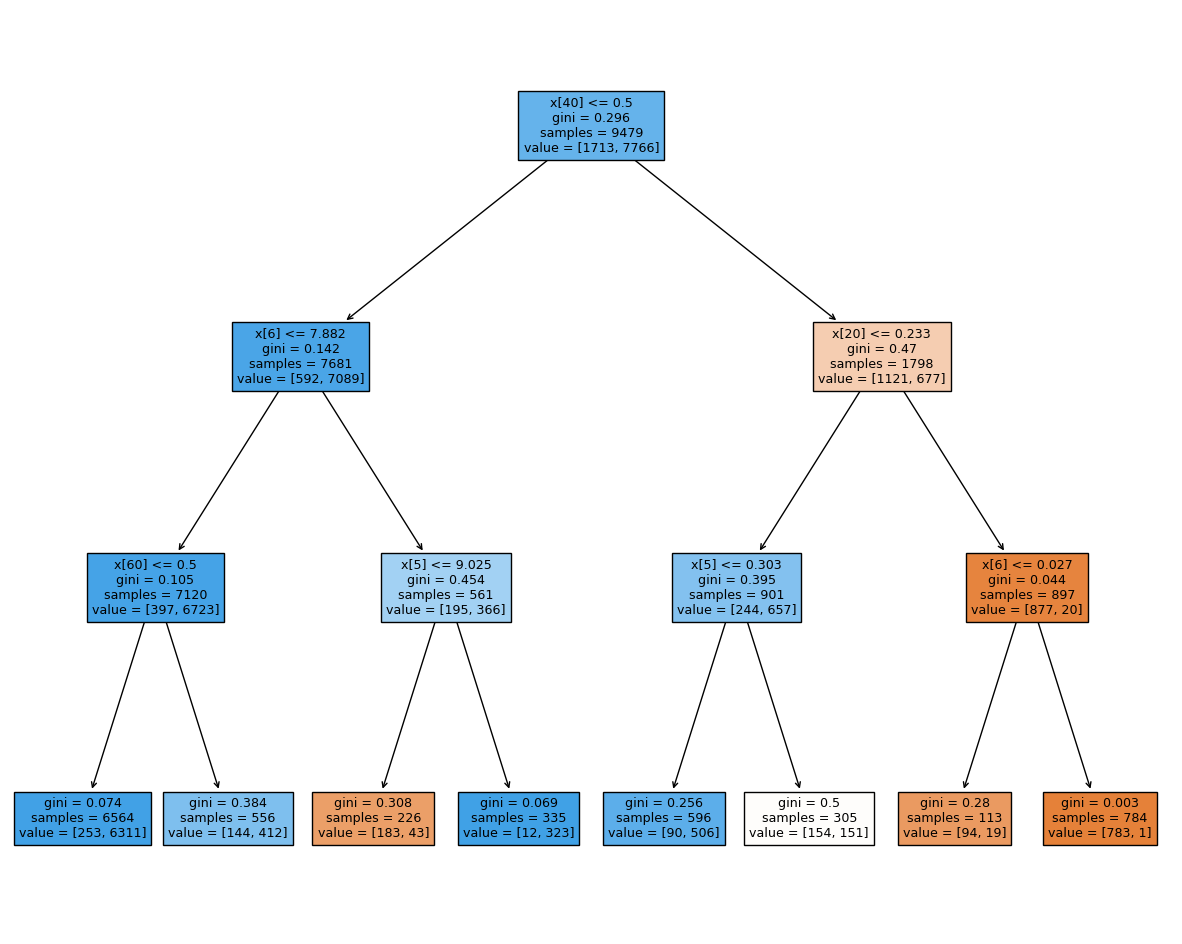

In [35]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random Forest

Training Accuracy RandomForestClassifier 99.60  Test Accuracy RandomForestClassifier 97.30
Training Precision RandomForestClassifier 99.85  Test Precision RandomForestClassifier 98.39
Training Recall RandomForestClassifier 99.67  Test Recall RandomForestClassifier 98.29
Training F1 Score RandomForestClassifier 99.76  Test F1 Score RandomForestClassifier 98.34


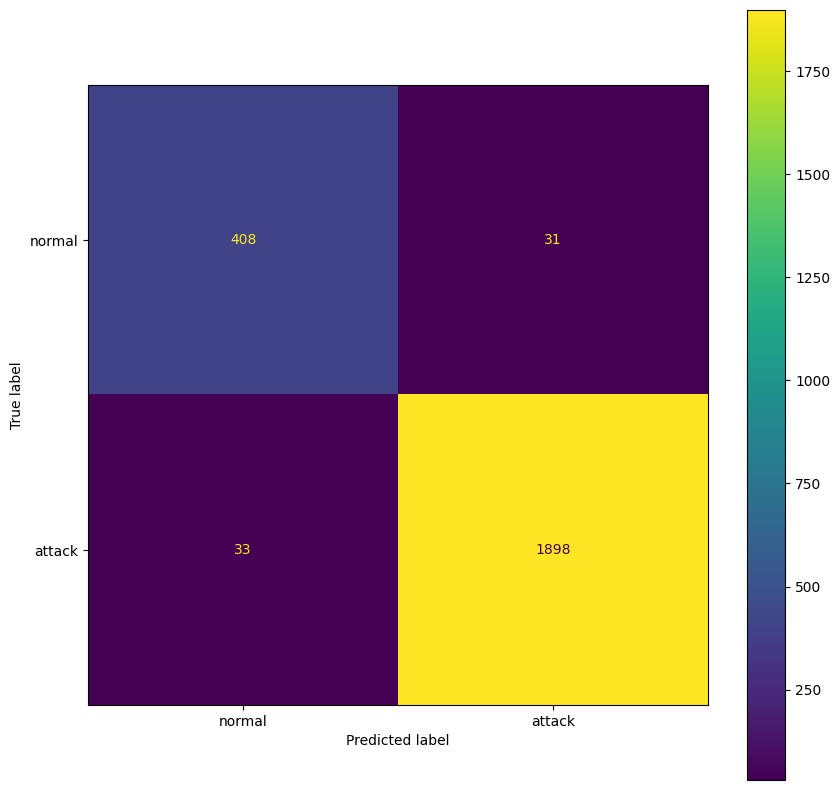

In [36]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

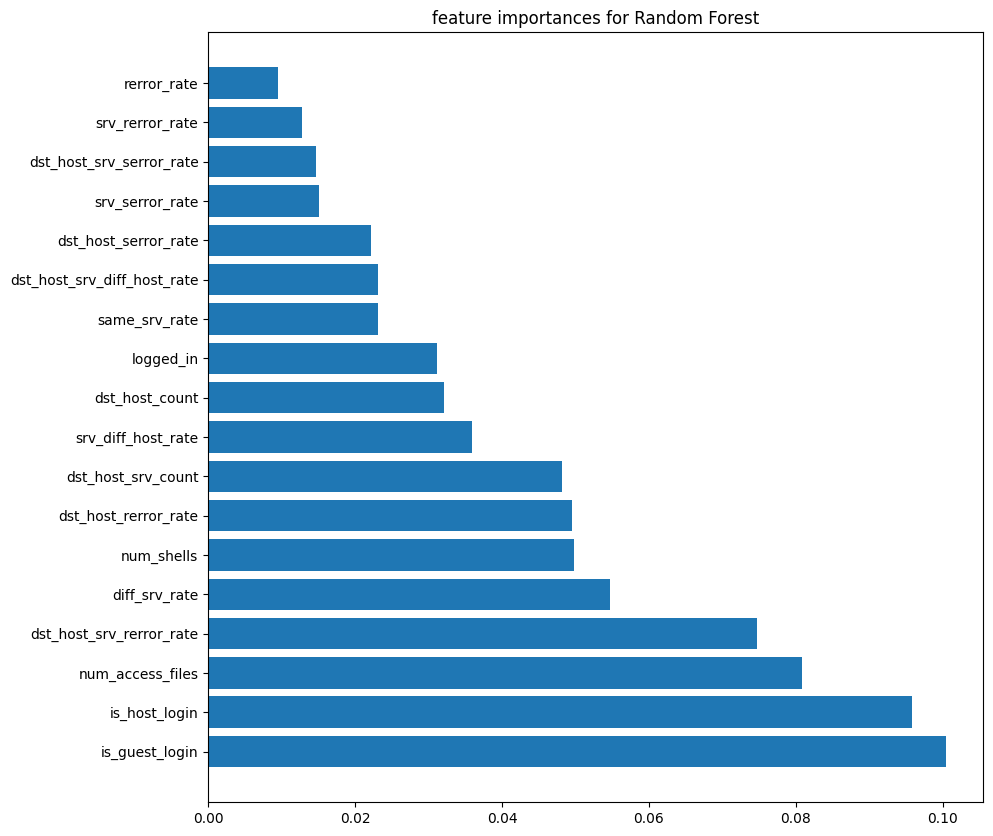

In [37]:
f_importances("Random Forest", abs(rf.feature_importances_), features_names, top=18)

## XGBOOST

Building an XGBOOST Regressor in order to predict threat level

In [38]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:27:51] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [39]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print(f"{name} Training Error: {train_error}, {name} Testing Error: {test_error}")

XGBOOST Training Error: 1.92487575331455, XGBOOST Testing Error: 2.235052444853125


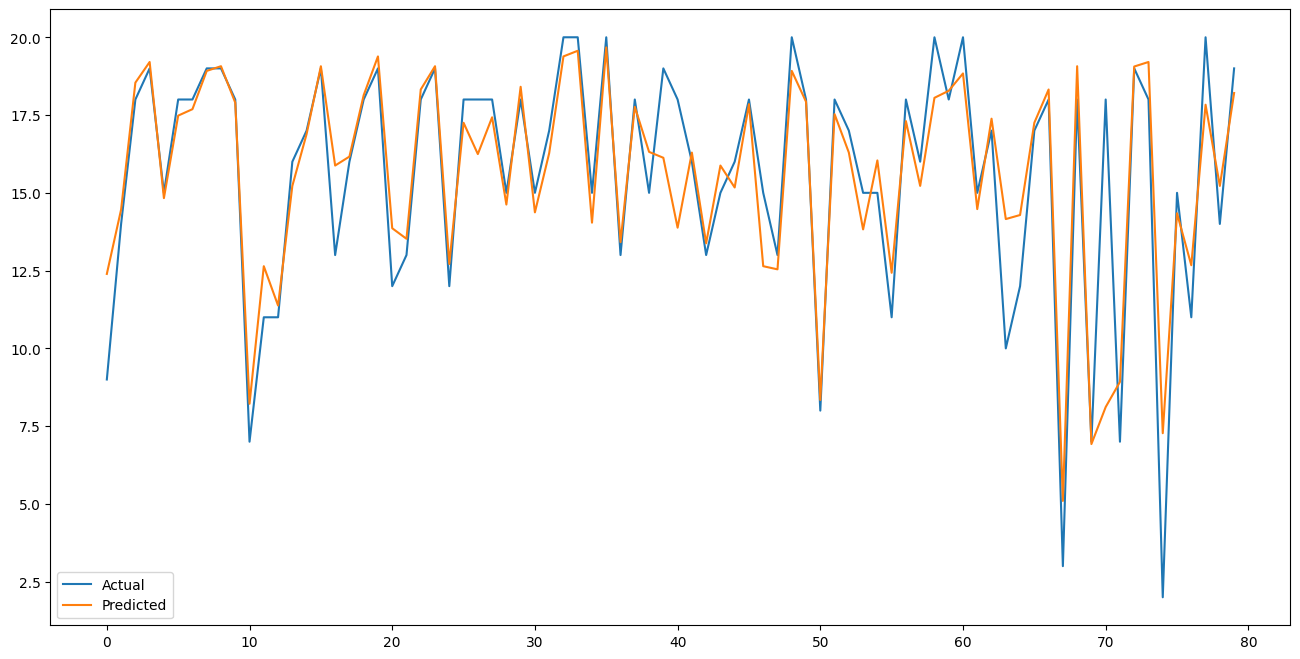

In [40]:
y_pred = xg_r.predict(x_test_reg)
data = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

Training Accuracy XGBoost 99.42  Test Accuracy XGBoost 97.55
Training Precision XGBoost 99.72  Test Precision XGBoost 98.55
Training Recall XGBoost 99.58  Test Recall XGBoost 98.45
Training F1 Score XGBoost 99.65  Test F1 Score XGBoost 98.50


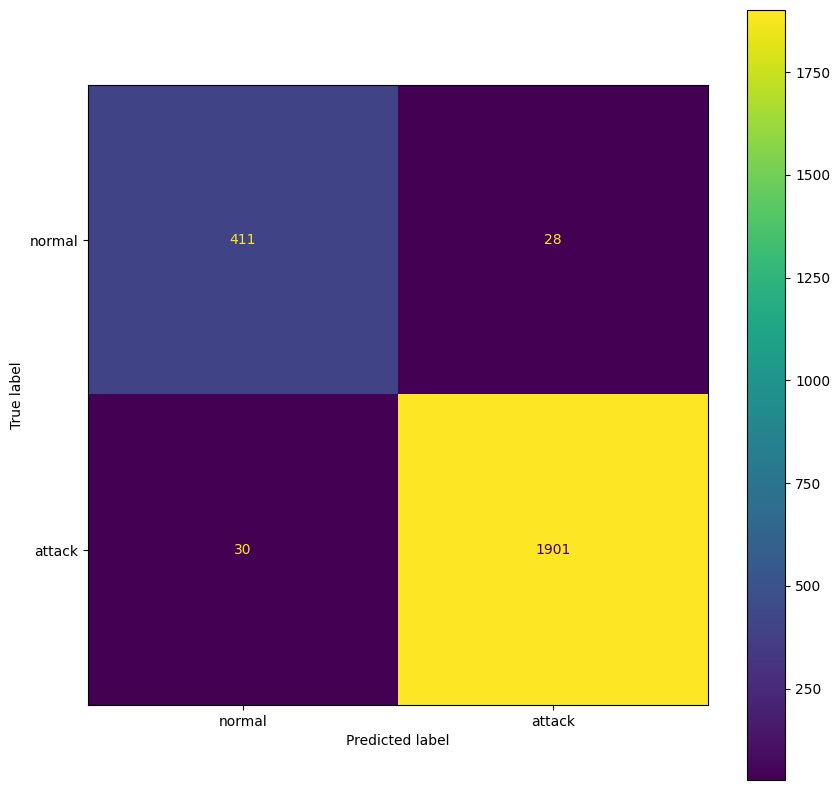

In [41]:
# Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_classifier.fit(x_train, y_train)

# Evaluate the XGBoost classifier
evaluate_classification(xgb_classifier, "XGBoost", x_train, x_test, y_train, y_test)

# Measuring effect of PCA

Training Accuracy PCA RandomForest 99.59  Test Accuracy PCA RandomForest 96.46
Training Precision PCA RandomForest 99.79  Test Precision PCA RandomForest 97.58
Training Recall PCA RandomForest 99.70  Test Recall PCA RandomForest 98.08
Training F1 Score PCA RandomForest 99.75  Test F1 Score PCA RandomForest 97.83


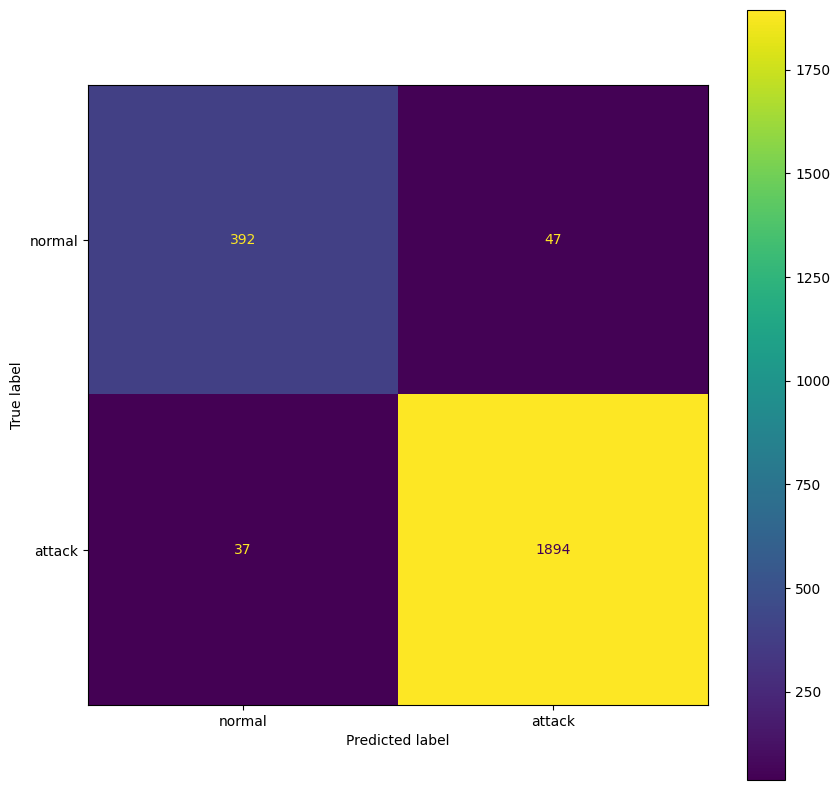

In [42]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# No effect????? (To be confirmed)

# Neural Network

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]),
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7360      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

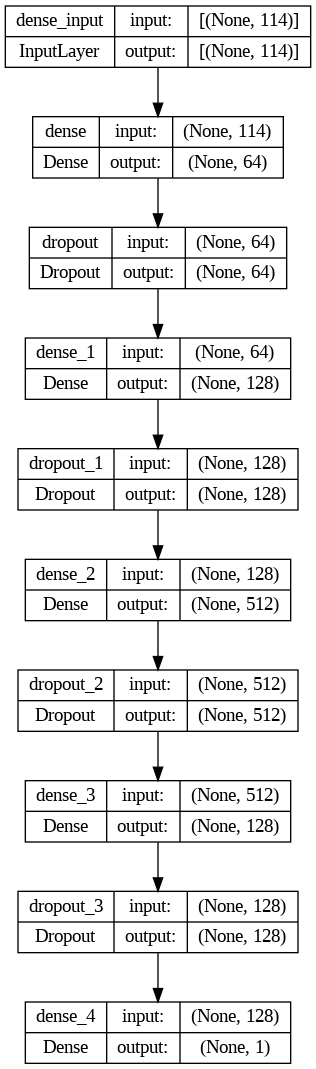

In [45]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


297/297 [==============================] - 8s 13ms/step - loss: 106.1197 - accuracy: 0.8073 - val_loss: 2.7684 - val_accuracy: 0.8439
Epoch 2/10
297/297 [==============================] - 2s 7ms/step - loss: 44.3496 - accuracy: 0.8596 - val_loss: 1.2066 - val_accuracy: 0.9093
Epoch 3/10
297/297 [==============================] - 1s 5ms/step - loss: 29.6788 - accuracy: 0.9024 - val_loss: 0.7414 - val_accuracy: 0.9160
Epoch 4/10
297/297 [==============================] - 1s 5ms/step - loss: 20.7099 - accuracy: 0.9086 - val_loss: 0.5769 - val_accuracy: 0.9249
Epoch 5/10
297/297 [==============================] - 1s 5ms/step - loss: 16.1510 - accuracy: 0.9152 - val_loss: 0.4459 - val_accuracy: 0.9266
Epoch 6/10
297/297 [==============================] - 2s 7ms/step - loss: 11.8864 - accuracy: 0.9227 - val_loss: 0.3810 - val_accuracy: 0.9308
Epoch 7/10
297/297 [==============================] - 2s 6ms/step - loss: 7.9577 - accuracy: 0.9244 - val_loss: 0.3390 - val_accuracy: 0.9321
Epoch 8/1

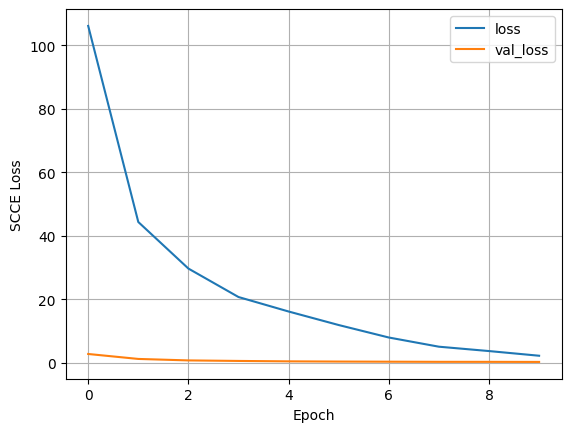

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

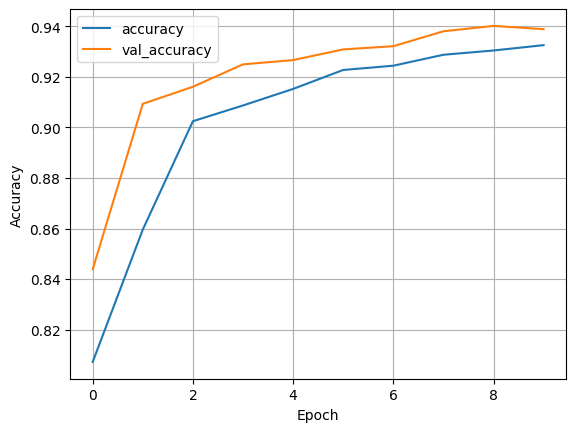

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

<ipython-input-52-978516641877>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


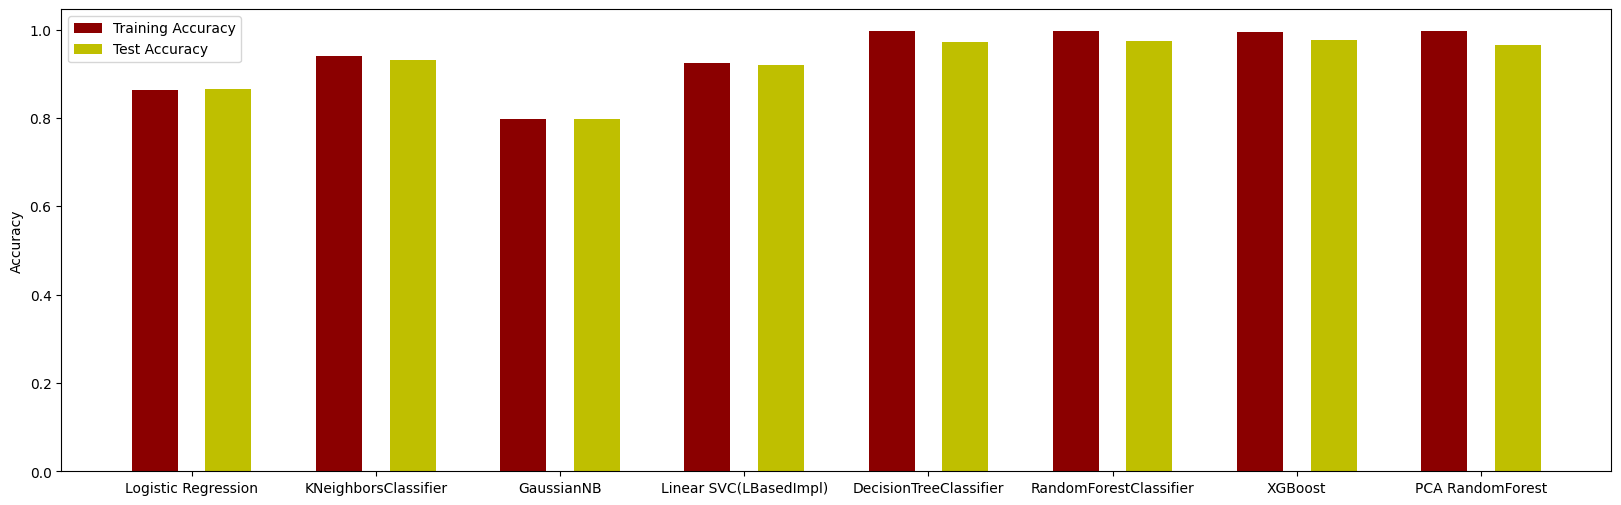

In [52]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

<ipython-input-53-ab66f9db636d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


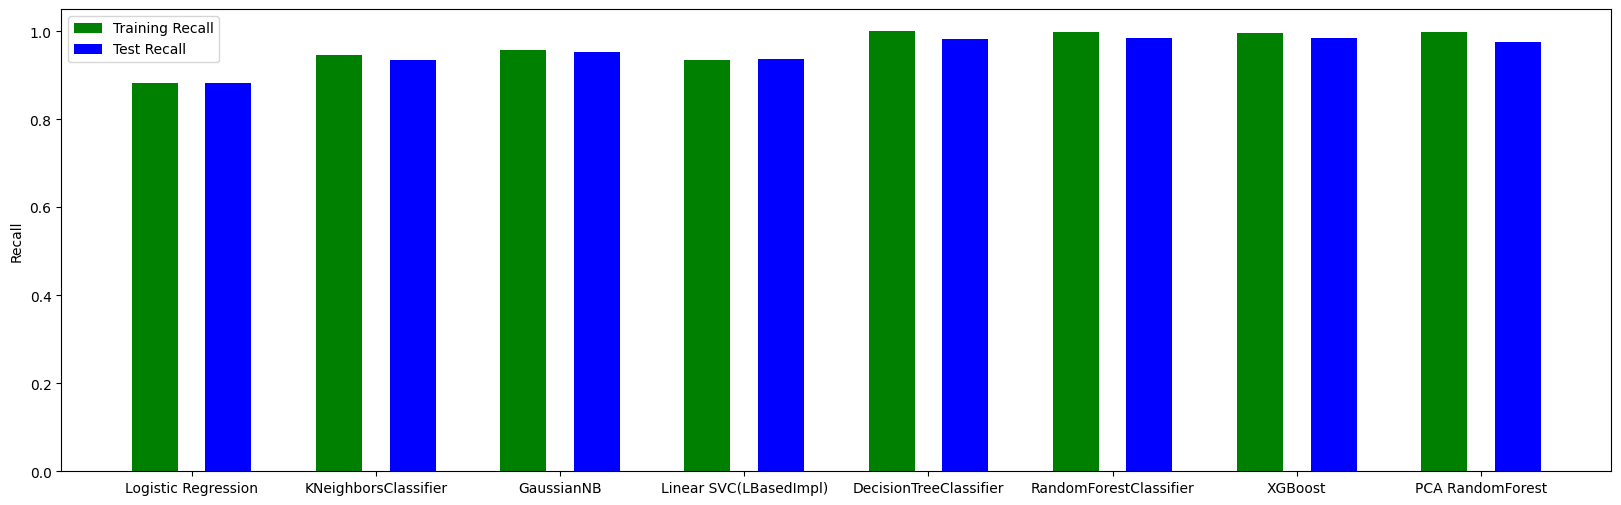

In [53]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

# Making new prediction

In [46]:
# def predict_with_model(features, loaded_model):
#     # Ensure the input features are in the correct order and format
#     input_features = np.array(features).reshape(1, -1)

#     scaler = StandardScaler()

#     z = np.load('scaled-input.npy')

#     scaler.fit_transform(z)

#     # Scale the input features using the provided scaler
#     scaled_features = scaler.transform(input_features)

#     # Make predictions using the loaded model
#     prediction = loaded_model.predict(scaled_features)

#     # Return the prediction
#     return prediction

In [47]:
# loaded_model = pickle.load(open(model_filename, 'rb'))
# input_features = top_feature_indices_unflattened.flatten()[:n_components]

# model_predictions = predict_with_model(input_features, loaded_model)
# print("Model Predictions:", model_predictions)

In [48]:
# loaded_model = pickle.load(open(model_filename, 'rb'))
# input_features = top_feature_indices_unflattened.flatten()[n_components:n_components+10]

# model_predictions = predict_with_model(input_features, loaded_model)
# print("Model Predictions:", model_predictions)